#Window Functions in Pandas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Calculating a rolling average
google=pd.read_csv('google.csv',parse_dates=['Date'],index_col='Date')
google.head(10)

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10
2014-01-07,568.86
2014-01-08,570.04
2014-01-09,564.55
2014-01-10,564.52


In [ ]:
#integer Based Window size
google.rolling(window=5).mean()
google.head(10)

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10
2014-01-07,568.86
2014-01-08,570.04
2014-01-09,564.55
2014-01-10,564.52


In [ ]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 17.1 KB


In [ ]:
#Offset Based Window size
google.rolling(window='5D').mean() #'5D': 5 calendar Days
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 17.1 KB


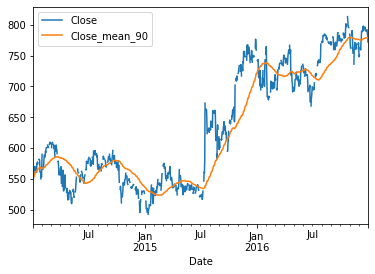

In [ ]:
#90 day rolling mean

r90= google.rolling(window='90D').mean()
google.join(r90.add_suffix('_mean_90')).plot()

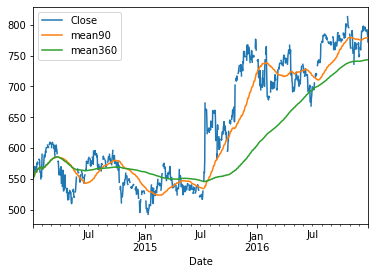

In [ ]:
google['mean90']= r90
r360= google['Close'].rolling(window='360D').mean()
google['mean360']= r360; google.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9ed4c2ce80>,
      dtype=object)

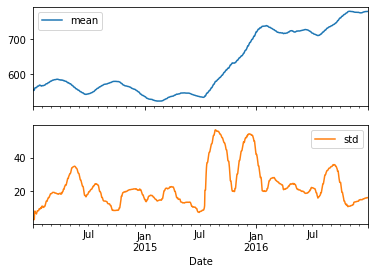

In [ ]:
#Multiple rolling metrics
r= google.Close.rolling('90D').agg(['mean','std'])
r.plot(subplots=True)

#Expanding Windows in Pandas

In [ ]:
data=pd.read_csv('sp500.csv',parse_dates=['date'],index_col='date')

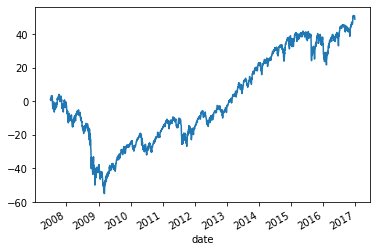

In [ ]:
#Running rate of Return in practice
pr= data.SP500.pct_change() # preiod return
pr_plus_one = pr.add(1)
cumulative_return = pr_plus_one.cumprod().sub(1)
cumulative_return.mul(100).plot()

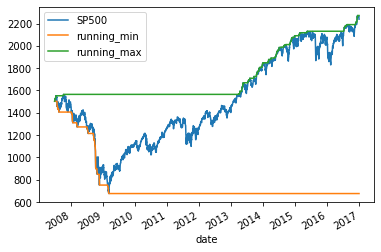

In [ ]:
#Getting the running min and max
data['running_min']=data.SP500.expanding().min()
data['running_max']=data.SP500.expanding().max()
data.plot()


#Rolling Annual Rate of Return

In [ ]:
def multi_period_return(period_returns):
  return np.prod(period_returns +1)-1
pr= data.SP500.pct_change() # Period Return
r =pr.rolling('360D').apply(multi_period_return)
data['Rolling 1yr Return']= r.mul(100)
data.plot(figsize=(10,6),subplots=True)

#Case Study- S&P500 price simulation

In [ ]:
pip install seaborn

In [ ]:
from numpy.random import normal, seed
import seaborn as sns
from scipy.stats import norm
seed(42)
random_returns = normal(loc=0,scale=0.01, size=1000)
sns.distplot(random_returns,fit=norm, kde=False)

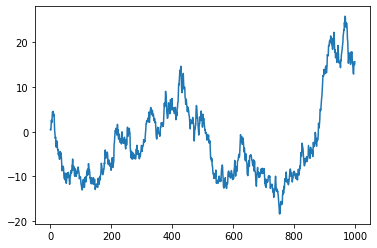

In [ ]:
#Create a random price path
return_series = pd.Series(random_returns)
random_prices = return_series.add(1).cumprod().sub(1)
random_prices.mul(100).plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9ec7b70df0>,
      dtype=object)

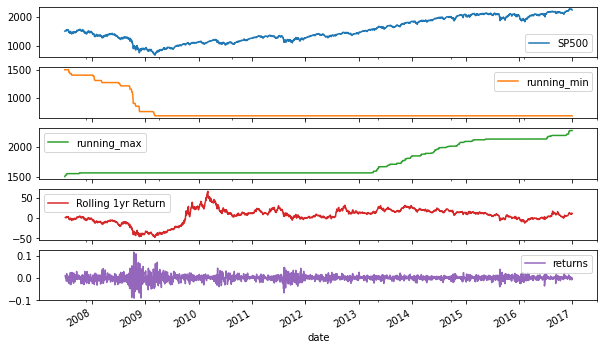

In [ ]:
#S&P500 prices & Returns
data['returns']=data.SP500.pct_change()
data.plot(figsize=(10,6),subplots=True)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


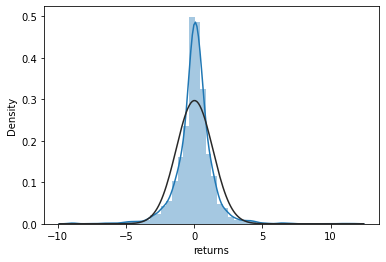

In [ ]:
#S&P500 Return Distribution
sns.distplot(data.returns.dropna().mul(100), fit=norm)

In [ ]:
#Generate Random And S&P500 Returns
from numpy.random import choice
sample= data.returns.dropna()
n_obs= data.returns.count()
random_walk= choice(sample,size=n_obs)
random_walk= pd.Series(random_walk,index=sample.index)
random_walk.head()

date
2007-07-02    0.005007
2007-07-03    0.040729
2007-07-05   -0.000322
2007-07-06   -0.008404
2007-07-09    0.002119
dtype: float64

In [ ]:
#Random S&P500 prices
start= data.SP500.first('D')
start

date
2007-06-29    1503.35
Name: SP500, dtype: float64

In [ ]:
sp500_random = start.append(random_walk.add(1))
sp500_random.head()

date
2007-06-29    1503.350000
2007-07-02       1.005007
2007-07-03       1.040729
2007-07-05       0.999678
2007-07-06       0.991596
dtype: float64

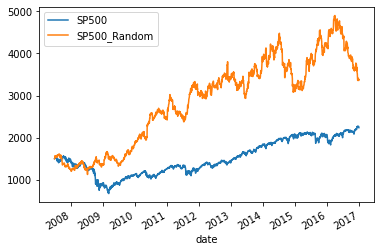

In [ ]:
data['SP500_Random'] = sp500_random.cumprod()
data[['SP500','SP500_Random']].plot()